# SDES Project1: LC Tank with a resistance(constant voltage applied)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from tempfile import NamedTemporaryFile
from IPython.display import HTML

### C is capacitance of the capacitor, L is inducatance of inductor, R is resistor's resistance,V is the voltage applied, V0 is initial voltage across capacitor and I0 being initial current across the inductor, tf is the total time and n is the number of time steps

In [3]:
def problem(C,L,R,V,V0,I0,tf,n):
    det = ((R*R)/(L*L)) - (4/(L*C)) + 0.0j
    t = np.linspace(0.,tf,n)
    if abs(det) == 0:
        D1 = (I0/C)*np.exp(1/(2.0*R*C))
        D2 = (V0 - V)*np.exp(1/(2.0*R*C))
        V_matrix = V + np.exp(-(1/2.0*R*C)*t)*(D1*t + D2)
        i_matrix = C*np.exp(-t/(2.0*R*C))*(D1 - (D1*t + D2)/(2.0*R*C)) 
    else :
        s1 = -0.5*R/L + 0.5*np.sqrt(det)
        s2 = -0.5*R/L - 0.5*np.sqrt(det)
        A1 = ((I0/C) - (V0 - V)*s2)/(s1 - s2)
        A2 = ((I0/C) - (V0 - V)*s1)/(s2 - s1)
        V_matrix = V + A1*np.exp(s1*t) + A2*np.exp(s2*t)
        i_matrix = C*(A1*s1*np.exp(s1*t) + A2*s2*np.exp(s2*t))
    return V_matrix,i_matrix,t


#### The results are plotted showing the voltage across the capacitor varying with time for three cases of damping

/usr/lib/python2.7/dist-packages/numpy/core/numeric.py:460: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


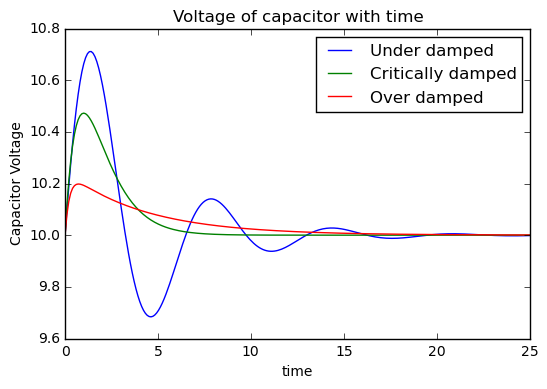

In [4]:
V_u,i_u,t_u = problem(1.0, 1.0,0.5, 10.0, 10.0, 1.0, 25.0, 250)
V_c,i_c,t_c = problem(1.0, 1.0,2.0, 10.0, 10.0, 1.0, 25.0, 250)
V_o,i_o,t_o = problem(1.0, 1.0,4.5, 10.0, 10.0, 1.0, 25.0, 250)
plt.figure(1)
plt.plot(t_u,V_u,label = 'Under damped')
plt.plot(t_c,V_c,label = 'Critically damped')
plt.plot(t_o,V_o,label = 'Over damped')
plt.title('Voltage of capacitor with time')
plt.ylabel('Capacitor Voltage')
plt.xlabel('time')
plt.legend()
plt.savefig('VC.png')

#### The results were plotted showing variation of voltage across the capacitor, inductor and resistor for an underdamped case of R = 0.5.

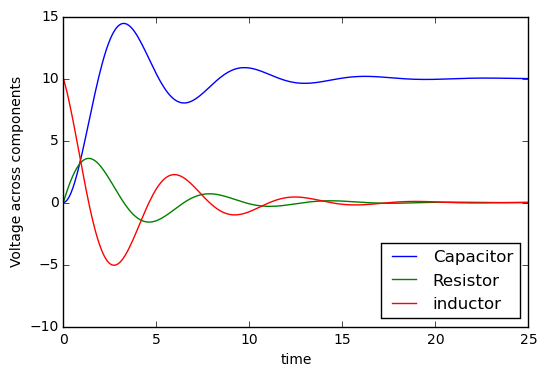

In [5]:
R = 0.5
V = 10.0
V_u,i_u,t_u = problem(1.0, 1.0,R, 10.0, 0.0, 0.0, 25.0, 250)
plt.plot(t_u,V_u,label = 'Capacitor')
plt.plot(t_u,R*i_u,label = 'Resistor')
plt.plot(t_u, V - V_u - R*i_u ,label = 'inductor')
plt.xlabel('time')
plt.ylabel('Voltage across components')
plt.legend(loc = 'lower right')
plt.savefig('V.png')

### The code required for animation.

In [6]:
VIDEO_TAG = """<video controls>
     <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
     Your browser does not support the video tag.
    </video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")

    return VIDEO_TAG.format(anim._encoded_video)

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

In [7]:
def animate(X,Y):
    fig = plt.figure()
    ax = plt.axes(xlim=(np.amin(X), np.amax(X)), ylim=(np.amin(Y)-0.1, np.amax(Y)+0.1))
    line, = ax.plot([], [], lw=2)

    def init():
        line.set_data([],[])
        return line,
    def animate(i):
        x = X[:i]
        y = Y[:i]
        line.set_data(x, y)
        return line,

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=250, interval=5, blit=True)
    return anim

### The following animation is showing the variation of potential difference across capacitor with time in an underdamped case with R = 0.5.  Please click the play button in the input for the animation to be played.

In [8]:
display_animation(animate(t_u,V_u))

/usr/lib/python2.7/dist-packages/matplotlib/transforms.py:979: ComplexWarning: Casting complex values to real discards the imaginary part
  self._points[:, 1] = interval


### The following animation shows the variation of current in the circuit with time.

In [102]:
display_animation(animate(t_u,i_u))